## WIFI LOCATIONING

### Topic:

Evaluating the application of machine learning techniques to the problem of indoor locationing via wifi fingerprinting.

Automatic user localization consists of estimating the position of the user  by using an electronic device, usually a mobile phone. While outdoor localisation can be done by using GPS, indoor localisation is still a technical challenge.

Localising an electronic device and its user by using the signal strength in connection to Wireless Access Points (WAPs) is one of the innovative answers to this challenge. The goal of this project is to explore the accuracy of this concept to find the exact location of a certain user.

### Importing Libraries

In [1866]:
#import libraries

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pyproj import Proj
from matplotlib.pyplot import figure
%matplotlib inline

### Loading Data

In [1867]:
#loading training and testing Data Sets

Wifi_train = pd.read_excel('trainingData.xlsx')

Wifi_validation = pd.read_excel('validationData.xlsx')

raw_train_data = Wifi_train.copy()
raw_valid_data = Wifi_validation.copy()



### Initial Data Exploration

In [1868]:
Wifi_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.264300,4864920.778200,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.621200,4864934.225200,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.152400,4864949.532200,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.570400,4864934.093000,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.143600,4864982.217100,0,0,122,2,11,13,1369909710


### Attribute Information:



**Attribute 001 (WAP001)**: Intensity value for WAP001. Negative integer values from -104 to 0 and +100. Positive value 100 used if WAP001 was not detected.
....

**Attribute 520 (WAP520)**: Intensity value for WAP520. Negative integer values from -104 to 0 and +100. Positive Vvalue 100 used if WAP520 was not detected.

**Attribute 521 (Longitude)**: Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000

**Attribute 522 (Latitude)**: Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018.

**Attribute 523 (Floor)**: Altitude in floors inside the building. Integer values from 0 to 4.

**Attribute 524 (BuildingID)**: ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2.

**Attribute 525 (SpaceID)**: Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values.

**Attribute 526 (RelativePosition)**: Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values.

**Attribute 527 (UserID**): User identifier (see below). Categorical integer values.

**Attribute 528 (PhoneID)**: Android device identifier (see below). Categorical integer values.

**Attribute 529 (Timestamp)**: UNIX Time when the capture was taken. Integer value. 

In [1869]:
Wifi_train.info()

pd.set_option('display.float_format', lambda x: '%.6f' % x)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [1870]:
Wifi_train.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000
mean,99.823644,99.820936,100.000000,100.000000,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.000000,-7464.275947,4864870.888687,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1371421250.681647
std,5.866842,5.798156,0.000000,0.000000,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.000000,123.402010,66.933183,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,557205.399312
min,-97.000000,-90.000000,100.000000,100.000000,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.000000,-7691.338400,4864745.745016,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1369908924.000000
25%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,-7594.737000,4864820.875300,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1371055818.000000
50%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,-7423.060900,4864852.149700,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1371715972.000000
75%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,-7359.193000,4864929.890300,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1371721046.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,-7300.818990,4865016.687800,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1371737745.000000


In [1871]:
#are there any missing values in the data set?

print(Wifi_train.isnull().values.any())
print(Wifi_validation.isnull().values.any())

False
False


In [1872]:
#weakest signal of all WAP's
print(Wifi_train.iloc[:,0:520].min().min())
print(Wifi_validation.iloc[:,0:520].min().min())

-104
-102


In [1873]:
#maximum value for signals of WAP's (meaning no signal at all)
Wifi_train.iloc[:,0:520].max().max()

100

In [1874]:
Wifi_train.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [1875]:
print(Wifi_train.shape)
print(Wifi_validation.shape)

(19937, 529)
(1111, 529)


In [1]:
#correlation between features except WAP's
corr = Wifi_train.iloc[:,520:529].corr()

NameError: name 'Wifi_train' is not defined

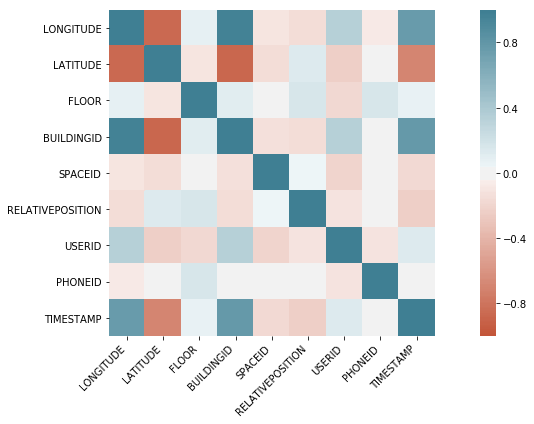

In [1877]:
# Heatmap for correlation between features (except WAPs)

fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

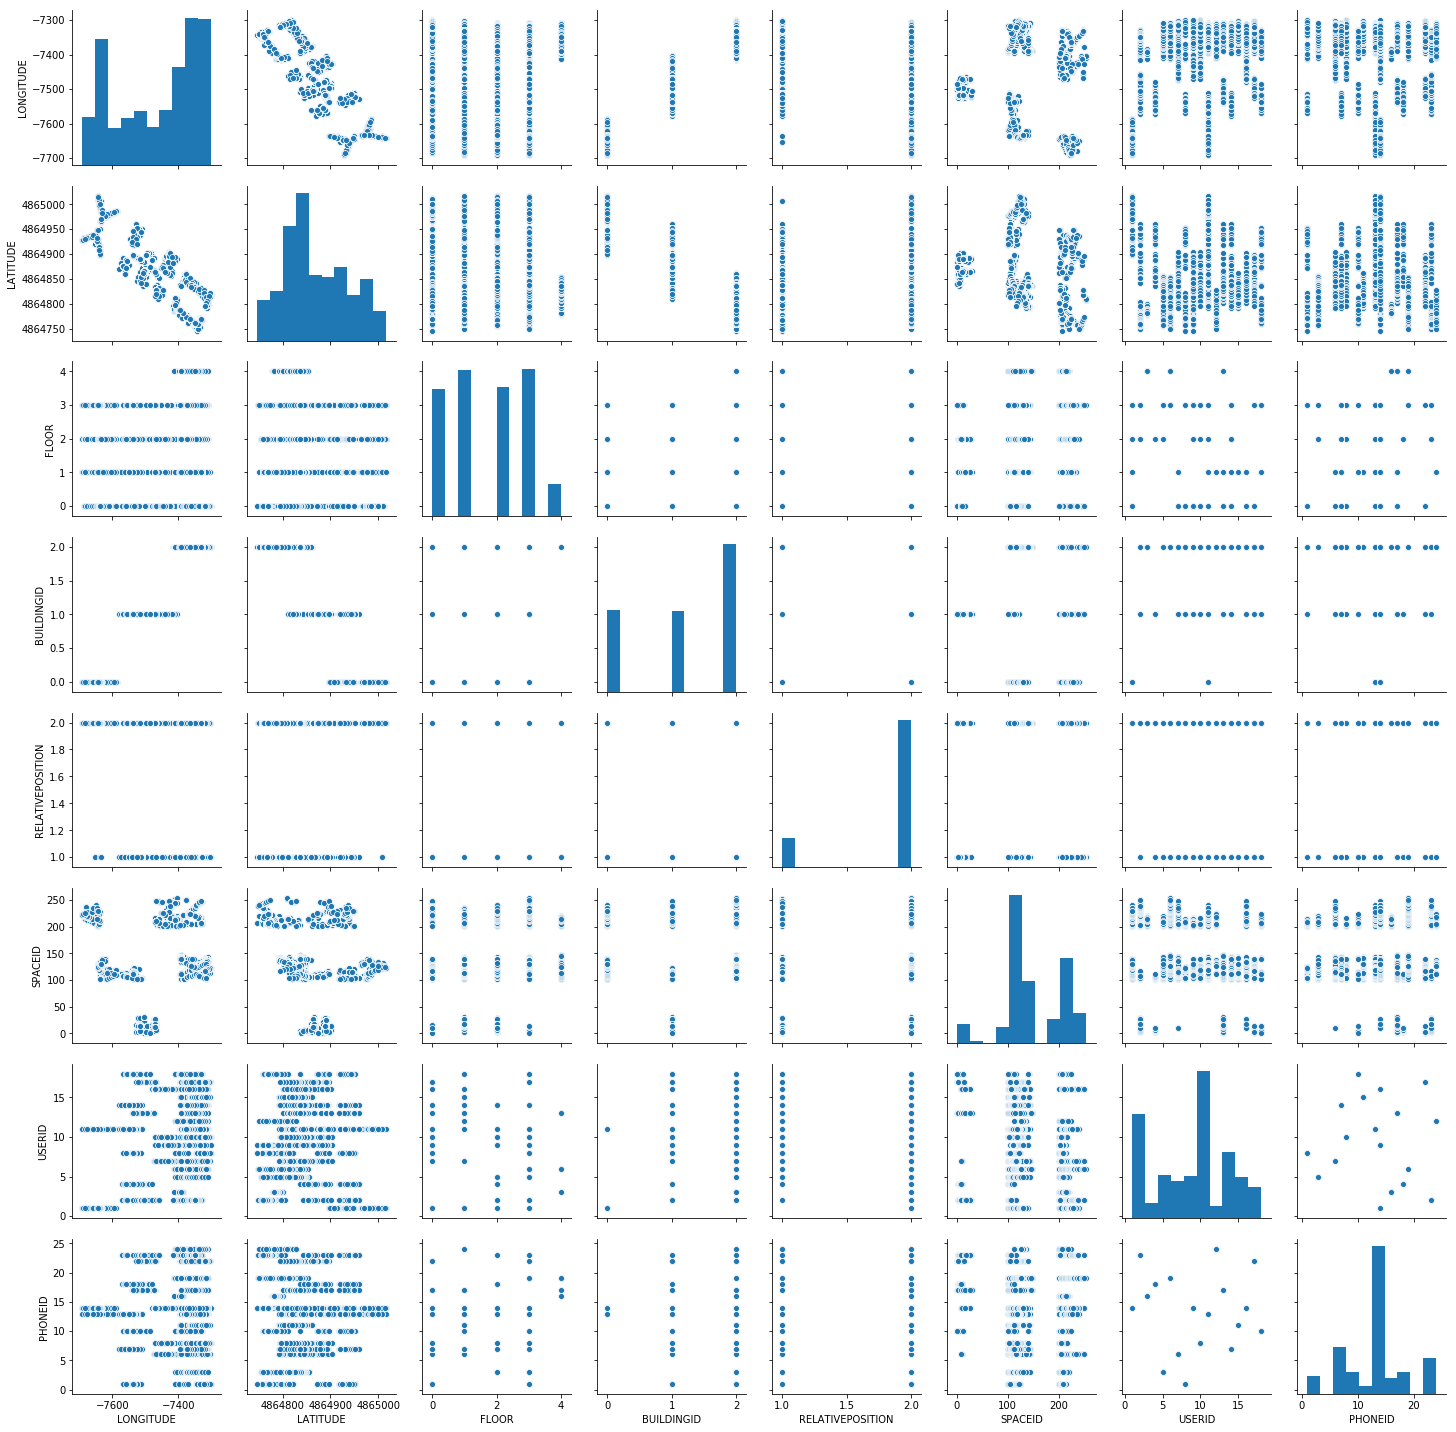

In [1878]:
sns.pairplot(Wifi_train[['LONGITUDE','LATITUDE','FLOOR','BUILDINGID','RELATIVEPOSITION','SPACEID','USERID','PHONEID']])

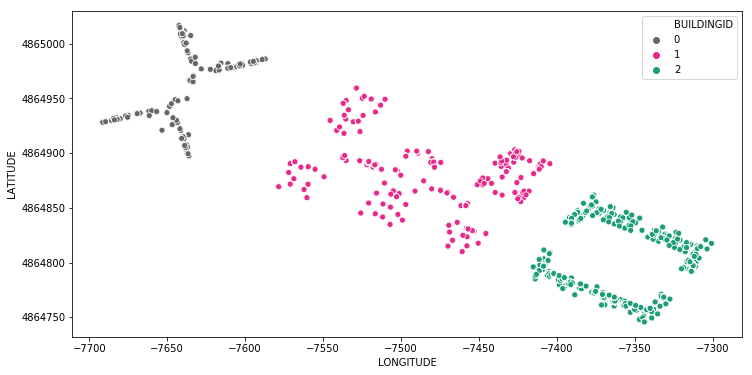

In [1879]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

sns.scatterplot(Wifi_train['LONGITUDE'],Wifi_train['LATITUDE'],hue=Wifi_train['BUILDINGID'],palette='Dark2_r')

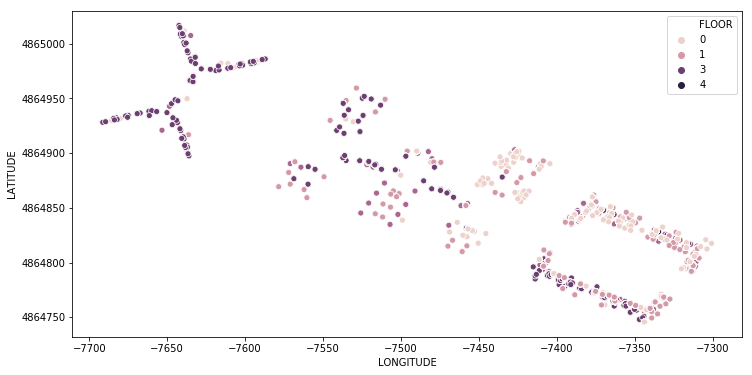

In [1880]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

sns.scatterplot(Wifi_train['LONGITUDE'],Wifi_train['LATITUDE'],hue=Wifi_train['FLOOR'])

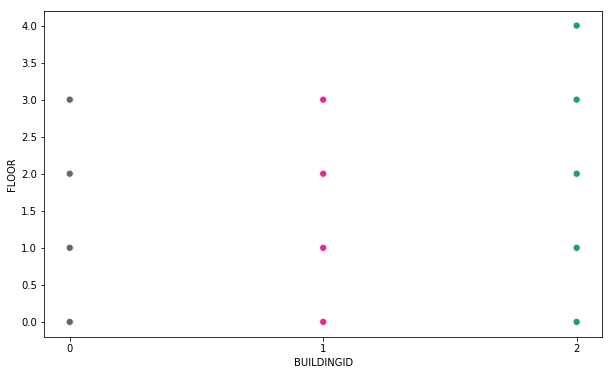

In [1881]:
#number of Floors per BuildingID

fig, ax = plt.subplots(1, 1, figsize = (10, 6))

sns.scatterplot(Wifi_train['BUILDINGID'],Wifi_train['FLOOR'],s= 200,marker='.',hue=Wifi_train['BUILDINGID'],palette='Dark2_r',legend=None)
ax.set_xticks(range(0,3))

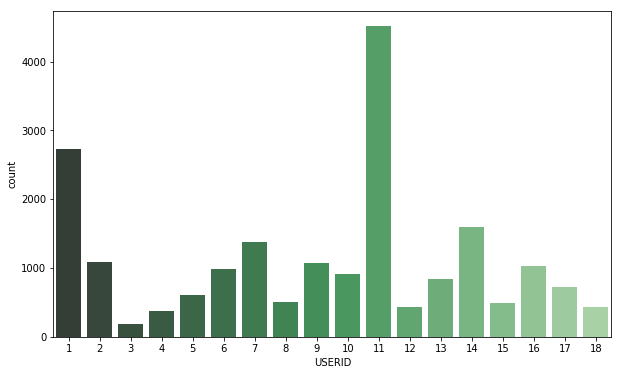

In [1882]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
h = sns.countplot(x='USERID',data= Wifi_train, palette="Greens_d")

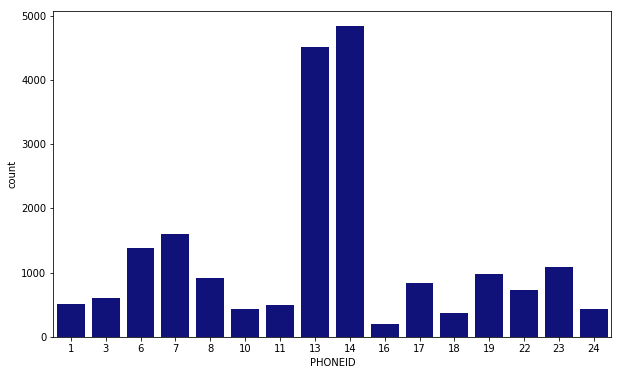

In [1883]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.countplot(x='PHONEID', data= Wifi_train, color='darkblue')

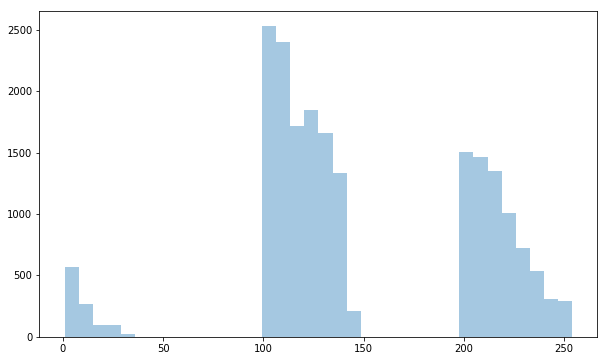

In [1884]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.distplot(list(Wifi_train['SPACEID'] ), kde = False)

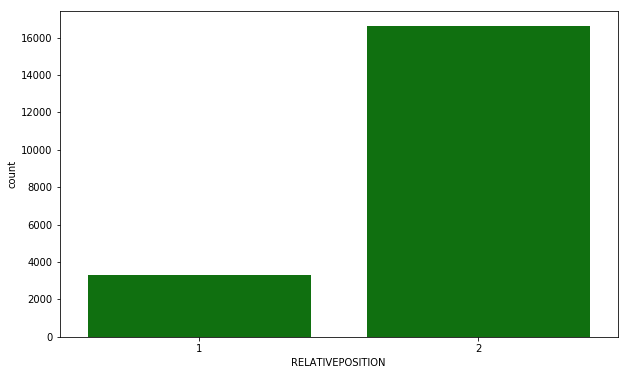

In [1885]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.countplot(x='RELATIVEPOSITION', data=Wifi_train, color='g')

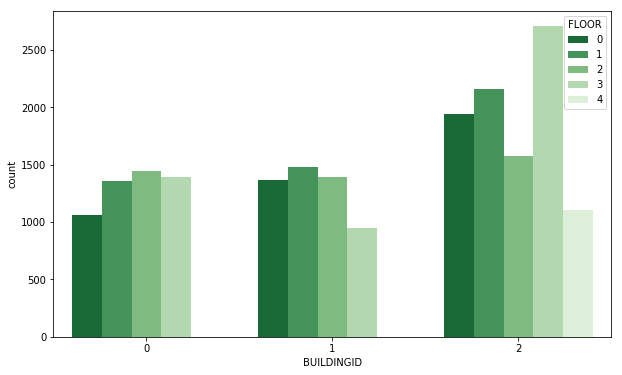

In [1886]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.countplot(x='BUILDINGID',data=Wifi_train, hue="FLOOR",palette='Greens_r')

In [1887]:
# How many fingerprints per User?

Wifi_train['USERID'].value_counts()

11    4516
1     2737
14    1596
7     1383
2     1091
9     1066
16    1032
6      980
10     913
13     841
17     724
5      610
8      507
15     498
18     440
12     437
4      374
3      192
Name: USERID, dtype: int64

## Data Preparation

#change data type from numeric to character for some features

Wifi_train[['FLOOR','BUILDINGID','RELATIVEPOSITION','SPACEID','USERID','PHONEID']] \
= Wifi_train[['FLOOR','BUILDINGID','RELATIVEPOSITION','SPACEID','USERID','PHONEID']].astype('category')

Wifi_validation[['FLOOR','BUILDINGID','RELATIVEPOSITION','SPACEID','USERID','PHONEID']] \
= Wifi_validation[['FLOOR','BUILDINGID','RELATIVEPOSITION','SPACEID','USERID','PHONEID']].astype('category')

In [1888]:
#Converting TIMESTAMP into Date Time format

Wifi_train['TIMESTAMP'] = Wifi_train['TIMESTAMP'].apply(datetime.fromtimestamp)
Wifi_validation['TIMESTAMP'] = Wifi_validation['TIMESTAMP'].apply(datetime.fromtimestamp)

In [1889]:
#converting UTM coordinates to longitude and latitude

#myProj = Proj("+proj=utm +zone=30S, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

In [1890]:
#Longitude, Latitude = myProj(Wifi_train['LONGITUDE'].values, Wifi_train['LATITUDE'].values, inverse=True)
#Longitude2, Latitude2 = myProj(Wifi_validation['LONGITUDE'].values, Wifi_validation['LATITUDE'].values, inverse=True)

In [1891]:
#replacing features Longitude, Latitude with new values

#Wifi_train['LONGITUDE'] = Longitude

#Wifi_train['LATITUDE'] = Latitude

#Wifi_validation['LONGITUDE'] = Longitude2

#Wifi_validation['LATITUDE'] = Latitude2

In [1892]:
#Sort Data Frame on correct TIMESTAMP order

Wifi_train = Wifi_train.sort_values('TIMESTAMP')
Wifi_validation = Wifi_validation.sort_values('TIMESTAMP')

### Duplicates

In [1893]:
#shape of Data Sets before cleaning process

print(Wifi_train.shape)
print(Wifi_validation.shape)

(19937, 529)
(1111, 529)


In [1894]:
#drop duplicates of wifi fingerprints to avoid redundancy of information

WAP_columns = list(Wifi_train.columns[0:529])

Wifi_train.drop_duplicates(subset= WAP_columns, keep='first',inplace=True)
Wifi_validation.drop_duplicates(subset= WAP_columns, keep='first',inplace=True)

print(Wifi_train.shape)
print(Wifi_validation.shape)

(19300, 529)
(1111, 529)


In [1895]:
#all WAP's in a separated Data Frame
WAPs = Wifi_train.iloc[:,:520]
WAPs2 = Wifi_validation.iloc[:,:520]

### New range for signal strength of WAPs

In [1896]:
#transpose Data Frame to visualize WAPs as independent variables

WAPs_trans = WAPs.transpose()

([<matplotlib.axis.XTick at 0x2324ec0abe0>,
 <a list of 26 Text xticklabel objects>)

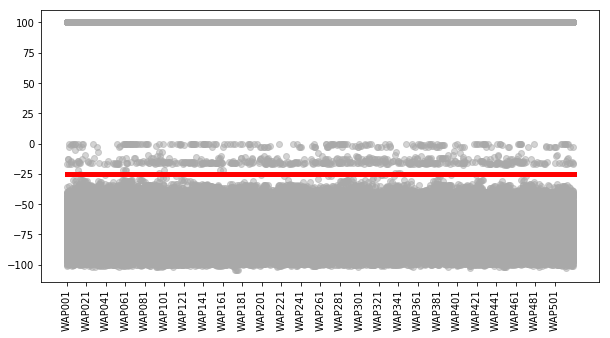

In [1897]:
#Detecting suspicious signal strengths/ouliers of WAPs

from itertools import chain

fig, ax = plt.subplots(1, 1, figsize = (10, 5))

plt.scatter( list(chain.from_iterable( [WAPs_trans.index.values.tolist()]*19300)), WAPs_trans,color = 'darkgrey',alpha=0.5)

plt.plot([0,520],[-25,-25],'k-', lw=5, color='red')

plt.xticks(list(range(0,520,20)), rotation='vertical')


In [1898]:
#adjusting signal strength value=100 (no signal) into plausible range (lower than weakest signal)
print(WAPs.min().min())
print(WAPs2.min().min())

-104
-102


In [1899]:
#new value for 'no signal'= -105 

WAPs[WAPs==100] = -105
WAPs2[WAPs2==100] = -105

Wifi_train.iloc[:,:520] = WAPs
Wifi_validation.iloc[:,:520] =WAPs2


([<matplotlib.axis.XTick at 0x23277750fd0>,
 <a list of 26 Text xticklabel objects>)

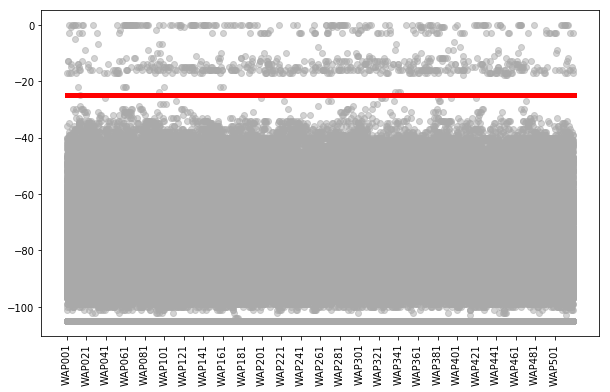

In [1900]:
#WAPs with changed 'no signal' of -105 instead if +100

from itertools import chain

fig, ax = plt.subplots(1, 1, figsize = (10, 6))

plt.scatter( list(chain.from_iterable( [WAPs_trans.index.values.tolist()]*19300)), WAPs_trans,color = 'darkgrey',alpha=0.5)

plt.plot([0,520],[-25,-25],'k-', lw=5, color='red')

plt.xticks(list(range(0,520,20)), rotation='vertical')

### Removing redundant columns (WAPs)

In [1901]:
#columns(WAPs) with no signal connection or constant signal don't add any information -> removed

l = Wifi_train.iloc[:,:520].max()==Wifi_train.iloc[:,:520].min()

l = l[l==True]
      
l.describe()

i = l.index

In [1902]:
#dropping columns 

Wifi_train.drop(i,axis=1, inplace=True)
Wifi_validation.drop(i,axis=1, inplace=True)

WAPs.drop(i, axis=1, inplace=True)

In [1903]:
#dropping columns which don't add relevant information for the modelling process

Wifi_train.drop(['SPACEID','RELATIVEPOSITION','USERID','PHONEID','TIMESTAMP'], axis=1, inplace=True)

#Wifi_validation.drop(['SPACEID','RELATIVEPOSITION','USERID','PHONEID','TIMESTAMP'], axis=1, inplace=True)

In [1904]:
print(Wifi_train.shape)
print(Wifi_validation.shape)

(19300, 469)
(1111, 474)


### Removing Outliers

In [1905]:
Wifi_train_col = Wifi_train.copy()
Wifi_validation_col = Wifi_validation.copy()

In [1906]:
#Outliers with signal strength between 0 and -25 are excluded

Wifi_train = Wifi_train.where(Wifi_train.iloc[:,:-4]<=-25)
Wifi_validation = Wifi_validation.where(Wifi_validation.iloc[:,:-9]<=-25)

In [1907]:
WAPs = WAPs.where(WAPs <= -25)
WAPs2 = WAPs2.where(WAPs2 <= -25)

In [1908]:
Wifi_train['LONGITUDE']= Wifi_train_col['LONGITUDE']
Wifi_train['LATITUDE']= Wifi_train_col['LATITUDE']
Wifi_train['BUILDINGID']= Wifi_train_col['BUILDINGID']
Wifi_train['FLOOR']= Wifi_train_col['FLOOR']

Wifi_validation['LONGITUDE']= Wifi_validation_col['LONGITUDE']
Wifi_validation['LATITUDE']= Wifi_validation_col['LATITUDE']
Wifi_validation['BUILDINGID']= Wifi_validation_col['BUILDINGID']
Wifi_validation['FLOOR']= Wifi_validation_col['FLOOR']
Wifi_validation['TIMESTAMP']=Wifi_validation_col['TIMESTAMP']
Wifi_validation['SPACEID']=Wifi_validation_col['SPACEID']
Wifi_validation['RELATIVEPOSITION']=Wifi_validation_col['RELATIVEPOSITION']
Wifi_validation['PHONEID']=Wifi_validation_col['PHONEID']
Wifi_validation['USERID']=Wifi_validation_col['USERID']

In [1909]:
print(Wifi_train.isnull().sum().sum())
print(Wifi_validation.isnull().sum().sum())

749
0


In [1910]:
print(WAPs.isnull().sum().sum())
print(WAPs2.isnull().sum().sum())

749
0


In [1911]:
Wifi_train = Wifi_train.dropna()
Wifi_validation = Wifi_validation.dropna()
WAPs = WAPs.dropna()
WAPs2 = WAPs2.dropna()

### Shape of Clean Data Set

In [1912]:
#Shape of Data Set before Cleaning and Pre_Processing

print(raw_train_data.shape)
print(raw_valid_data.shape)

(19937, 529)
(1111, 529)


In [1913]:
#Shape of Data Set after Cleaning Process

print(Wifi_train.shape)
print(Wifi_validation.shape)

(18825, 469)
(1111, 474)


([<matplotlib.axis.XTick at 0x23270fe5748>,
 <a list of 24 Text xticklabel objects>)

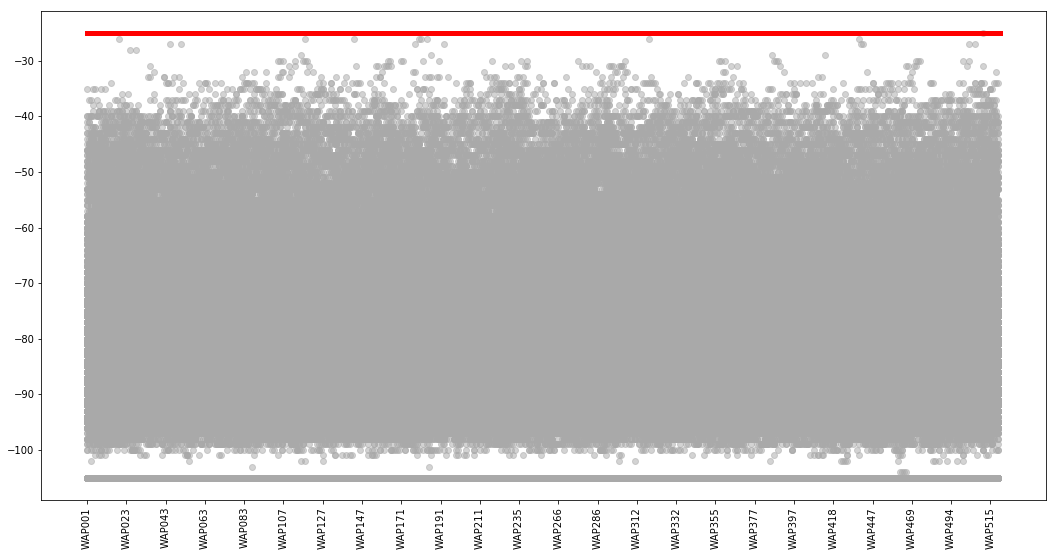

In [1914]:
WAPs_trans = WAPs.transpose()

fig, ax = plt.subplots(1, 1, figsize = (18, 9))

plt.scatter( list(chain.from_iterable( [WAPs_trans.index.values.tolist()]*18825)), WAPs_trans,color = 'darkgrey',alpha=0.5)

plt.plot([0,465],[-25,-25],'k-', lw=5, color='red')

plt.xticks(list(range(0,465,20)), rotation='vertical')

### Training Model for Predictions

## Predicting BUILDINGID 

## SVC

In [1915]:
Wifi_trainc = Wifi_train
Wifi_validationc = Wifi_validation

In [1916]:
# Classification 
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

In [1917]:
# split Data in training and test sets

from sklearn.model_selection import train_test_split


#separate dependent(target) variable and independent variables

target = Wifi_trainc.loc[:, Wifi_trainc.columns == 'BUILDINGID']

df = Wifi_trainc.drop(['BUILDINGID','LONGITUDE','LATITUDE','FLOOR'],axis=1)

#split Data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)

In [1918]:
#splitting validation data set

y_validation = Wifi_validationc.loc[:, Wifi_validationc.columns == 'BUILDINGID']

X_validation = Wifi_validationc.drop(['BUILDINGID','LONGITUDE','LATITUDE','FLOOR','USERID','PHONEID','TIMESTAMP','RELATIVEPOSITION','SPACEID'],axis=1)

In [1919]:
X_validation.columns

Index(['WAP001', 'WAP002', 'WAP005', 'WAP006', 'WAP007', 'WAP008', 'WAP009',
       'WAP010', 'WAP011', 'WAP012',
       ...
       'WAP510', 'WAP511', 'WAP512', 'WAP513', 'WAP514', 'WAP515', 'WAP516',
       'WAP517', 'WAP518', 'WAP519'],
      dtype='object', length=465)

In [1920]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score

In [1921]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 5, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
import warnings
warnings.filterwarnings('ignore')

svc_param_selection(X_train,y_train, 5)


{'C': 5, 'gamma': 0.001}

In [1922]:
# optimal parameter combination for SVM model 
model = SVC(C=5, gamma=0.001, kernel='rbf')

In [1923]:
model.fit(X_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1924]:
predictions = model.predict(X_test)

In [1925]:
print(confusion_matrix(y_test,predictions))

[[1224    0   83]
 [   0 1123  131]
 [   0    0 2146]]


In [1926]:
target_names = ['BUILDING_ID 0', 'BUILDING_ID 1', 'BUILDING_ID 2']

print(classification_report(y_test,predictions,target_names=target_names))

               precision    recall  f1-score   support

BUILDING_ID 0       1.00      0.94      0.97      1307
BUILDING_ID 1       1.00      0.90      0.94      1254
BUILDING_ID 2       0.91      1.00      0.95      2146

    micro avg       0.95      0.95      0.95      4707
    macro avg       0.97      0.94      0.95      4707
 weighted avg       0.96      0.95      0.95      4707



In [1927]:
accuracy_score(y_test,predictions)

0.9545357977480349

In [1928]:
cohen_kappa_score(predictions,y_test)

0.928475605716538

In [1929]:
# testing model with validation data set

predictions = model.predict(X_validation)

In [1930]:
print(confusion_matrix(y_validation,predictions))

[[290   0 246]
 [  0 145 162]
 [  0   0 268]]


In [1931]:
target_names = ['BUILDING_ID 0', 'BUILDING_ID 1', 'BUILDING_ID 2']

print(classification_report(y_validation,predictions,target_names=target_names))

               precision    recall  f1-score   support

BUILDING_ID 0       1.00      0.54      0.70       536
BUILDING_ID 1       1.00      0.47      0.64       307
BUILDING_ID 2       0.40      1.00      0.57       268

    micro avg       0.63      0.63      0.63      1111
    macro avg       0.80      0.67      0.64      1111
 weighted avg       0.85      0.63      0.65      1111



In [1932]:
accuracy_score(y_validation,predictions)

0.6327632763276327

In [1933]:
cohen_kappa_score(predictions, y_validation)

0.4687188671328344

### PREDICTING BUILDING ID
# KNN

In [1934]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()

def knn_param_selection(X, y, nfolds):
    K = [1,2,3,4,5]
    
    param_grid = {'n_neighbors': K}
    grid_search = GridSearchCV(knn, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
knn_param_selection(X_train,y_train, 5)

{'n_neighbors': 3}


In [1935]:
#optimal model
model = neighbors.KNeighborsClassifier(n_neighbors = 3)

In [1936]:
import warnings
warnings.filterwarnings('ignore')
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [1937]:
predictions = model.predict(X_test)

In [1938]:
print(confusion_matrix(y_test,predictions))

[[1307    0    0]
 [   0 1244   10]
 [   0    0 2146]]


In [1939]:
target_names = ['BUILDING_ID 0', 'BUILDING_ID 1', 'BUILDING_ID 2']

print(classification_report(y_test,predictions,target_names=target_names))

               precision    recall  f1-score   support

BUILDING_ID 0       1.00      1.00      1.00      1307
BUILDING_ID 1       1.00      0.99      1.00      1254
BUILDING_ID 2       1.00      1.00      1.00      2146

    micro avg       1.00      1.00      1.00      4707
    macro avg       1.00      1.00      1.00      4707
 weighted avg       1.00      1.00      1.00      4707



In [1940]:
accuracy_score(y_test,predictions)

0.9978755045676652

In [1941]:
cohen_kappa_score(predictions,y_test)

0.9966993547648779

In [1942]:
predictions = model.predict(X_validation)

In [1943]:
print(confusion_matrix(y_validation,predictions))

[[535   0   1]
 [  0 303   4]
 [  0   0 268]]


In [1944]:
target_names = ['BUILDING_ID 0', 'BUILDING_ID 1', 'BUILDING_ID 2']

print(classification_report(y_validation,predictions,target_names=target_names))

               precision    recall  f1-score   support

BUILDING_ID 0       1.00      1.00      1.00       536
BUILDING_ID 1       1.00      0.99      0.99       307
BUILDING_ID 2       0.98      1.00      0.99       268

    micro avg       1.00      1.00      1.00      1111
    macro avg       0.99      1.00      0.99      1111
 weighted avg       1.00      1.00      1.00      1111



In [1945]:
accuracy_score(y_validation,predictions)

0.9954995499549955

In [1946]:
cohen_kappa_score(predictions,y_validation)

0.9928907465803916

### BUILDING ID 
### Random Forest

In [1947]:
from sklearn.ensemble import RandomForestClassifier

In [1948]:
RF = RandomForestClassifier()

def RF_param_selection(X, y, nfolds):
    trees = [50,55,60,65,70,75,80,85,90,95,100]
    
    param_grid = {'n_estimators': trees}
    grid_search = GridSearchCV(RF, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
RF_param_selection(X_train,y_train, 5)

{'n_estimators': 50}

In [1949]:
#optimal model
model = RandomForestClassifier(n_estimators=50)

In [1950]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1951]:
predictions = model.predict(X_test)

In [1952]:
print(confusion_matrix(y_test,predictions))

[[1307    0    0]
 [   0 1246    8]
 [   0    0 2146]]


In [1953]:
target_names = ['BUILDING_ID 0', 'BUILDING_ID 1', 'BUILDING_ID 2']

print(classification_report(y_test,predictions,target_names=target_names))

               precision    recall  f1-score   support

BUILDING_ID 0       1.00      1.00      1.00      1307
BUILDING_ID 1       1.00      0.99      1.00      1254
BUILDING_ID 2       1.00      1.00      1.00      2146

    micro avg       1.00      1.00      1.00      4707
    macro avg       1.00      1.00      1.00      4707
 weighted avg       1.00      1.00      1.00      4707



In [1954]:
accuracy_score(y_test,predictions)

0.9983004036541322

In [1955]:
cohen_kappa_score(predictions,y_test)

0.9973598140932193

In [1956]:
predictions = model.predict(X_validation)

In [1957]:
print(confusion_matrix(y_validation,predictions))

[[536   0   0]
 [  1 306   0]
 [  0   0 268]]


In [1958]:
target_names = ['BUILDING_ID 0', 'BUILDING_ID 1', 'BUILDING_ID 2']

print(classification_report(y_validation,predictions,target_names=target_names))

               precision    recall  f1-score   support

BUILDING_ID 0       1.00      1.00      1.00       536
BUILDING_ID 1       1.00      1.00      1.00       307
BUILDING_ID 2       1.00      1.00      1.00       268

    micro avg       1.00      1.00      1.00      1111
    macro avg       1.00      1.00      1.00      1111
 weighted avg       1.00      1.00      1.00      1111



In [1959]:
accuracy_score(y_validation,predictions)

0.9990999099909991

In [1960]:
cohen_kappa_score(predictions,y_validation)

0.9985769600741876

### Predicting 'FLOOR"

In [1961]:
Wifi_trainc = Wifi_train
Wifi_validationc = Wifi_validation

In [1962]:
#separate dependent(target) variable and independent variables

target = Wifi_trainc.loc[:, Wifi_train.columns == 'FLOOR']

df = Wifi_trainc.drop(['BUILDINGID','LONGITUDE','LATITUDE','FLOOR'],axis=1)

#split Data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)

In [1963]:
#splitting validation data set
y_validation = Wifi_validationc.loc[:, Wifi_validationc.columns == 'FLOOR']


X_validation = Wifi_validationc.drop(['BUILDINGID','LONGITUDE','LATITUDE','FLOOR','USERID','PHONEID','TIMESTAMP','RELATIVEPOSITION','SPACEID'],axis=1)

In [1964]:
knn = neighbors.KNeighborsClassifier()

def knn_param_selection(X, y, nfolds):
    K = [2,3,4,5]
    
    param_grid = {'n_neighbors': K}
    grid_search = GridSearchCV(knn, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
knn_param_selection(X_train,y_train, 5)

{'n_neighbors': 3}

In [1965]:
#optimal model
model = neighbors.KNeighborsClassifier(n_neighbors = 3)

In [1966]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [1967]:
predictions = model.predict(X_test)

In [1968]:
print(confusion_matrix(y_test,predictions))

[[1068    0    0    0    0]
 [   5 1181    0    0    0]
 [   0    0 1148    3    0]
 [  10    0    0 1166    0]
 [   0    0    0    0  126]]


In [1969]:
target_names = ['FLOOR 0', 'FLOOR 1', 'FLOOR 2','FLOOR 3','FLOOR 4']

print(classification_report(y_test,predictions,target_names=target_names))

              precision    recall  f1-score   support

     FLOOR 0       0.99      1.00      0.99      1068
     FLOOR 1       1.00      1.00      1.00      1186
     FLOOR 2       1.00      1.00      1.00      1151
     FLOOR 3       1.00      0.99      0.99      1176
     FLOOR 4       1.00      1.00      1.00       126

   micro avg       1.00      1.00      1.00      4707
   macro avg       1.00      1.00      1.00      4707
weighted avg       1.00      1.00      1.00      4707



In [1970]:
accuracy_score(y_test,predictions)

0.9961759082217974

In [1971]:
cohen_kappa_score(predictions,y_test)

0.9949826403477651

In [1972]:
predictions = model.predict(X_validation)

In [1973]:
print(confusion_matrix(y_validation,predictions))

[[116   9   7   0   0]
 [ 12 404  46   0   0]
 [  4   7 281  14   0]
 [  0   1   3 167   1]
 [  2   0   0   5  32]]


In [1974]:
target_names = ['FLOOR 0', 'FLOOR 1', 'FLOOR 2','FLOOR 3','FLOOR 4']

print(classification_report(y_validation,predictions,target_names=target_names))

              precision    recall  f1-score   support

     FLOOR 0       0.87      0.88      0.87       132
     FLOOR 1       0.96      0.87      0.92       462
     FLOOR 2       0.83      0.92      0.87       306
     FLOOR 3       0.90      0.97      0.93       172
     FLOOR 4       0.97      0.82      0.89        39

   micro avg       0.90      0.90      0.90      1111
   macro avg       0.91      0.89      0.90      1111
weighted avg       0.90      0.90      0.90      1111



In [1975]:
accuracy_score(y_validation,predictions)

0.9000900090009001

In [1976]:
cohen_kappa_score(predictions,y_validation)

0.8607690831291703

### Predicting FLOOR

### Random Forest

In [1977]:
RF = RandomForestClassifier()

def RF_param_selection(X, y, nfolds):
    trees = [40,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140]
    
    param_grid = {'n_estimators': trees}
    grid_search = GridSearchCV(RF, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
RF_param_selection(X_train,y_train, 5)

{'n_estimators': 65}

In [1978]:
#optimal model
model = RandomForestClassifier(n_estimators=65)

In [1979]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=65, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1980]:
predictions = model.predict(X_test)

In [1981]:
print(confusion_matrix(y_test,predictions))

[[1068    0    0    0    0]
 [   5 1181    0    0    0]
 [   0    0 1151    0    0]
 [   8    0    0 1168    0]
 [   0    0    0    0  126]]


In [1982]:
target_names = ['FLOOR 0', 'FLOOR 1', 'FLOOR 2','FLOOR 3','FLOOR 4']

print(classification_report(y_test,predictions,target_names=target_names))

              precision    recall  f1-score   support

     FLOOR 0       0.99      1.00      0.99      1068
     FLOOR 1       1.00      1.00      1.00      1186
     FLOOR 2       1.00      1.00      1.00      1151
     FLOOR 3       1.00      0.99      1.00      1176
     FLOOR 4       1.00      1.00      1.00       126

   micro avg       1.00      1.00      1.00      4707
   macro avg       1.00      1.00      1.00      4707
weighted avg       1.00      1.00      1.00      4707



In [1983]:
accuracy_score(y_test,predictions)

0.9972381559379647

In [1984]:
cohen_kappa_score(predictions,y_test)

0.9963763211051714

In [1985]:
predictions = model.predict(X_validation)

In [1986]:
print(confusion_matrix(y_validation,predictions))

[[116   8   7   1   0]
 [  6 410  45   1   0]
 [  0   6 291   9   0]
 [  0   0   5 167   0]
 [  0   1   0  10  28]]


In [1987]:
target_names = ['FLOOR 0', 'FLOOR 1', 'FLOOR 2','FLOOR 3','FLOOR 4']

print(classification_report(y_validation,predictions,target_names=target_names))

              precision    recall  f1-score   support

     FLOOR 0       0.95      0.88      0.91       132
     FLOOR 1       0.96      0.89      0.92       462
     FLOOR 2       0.84      0.95      0.89       306
     FLOOR 3       0.89      0.97      0.93       172
     FLOOR 4       1.00      0.72      0.84        39

   micro avg       0.91      0.91      0.91      1111
   macro avg       0.93      0.88      0.90      1111
weighted avg       0.92      0.91      0.91      1111



In [1988]:
accuracy_score(y_validation,predictions)

0.9108910891089109

In [1989]:
cohen_kappa_score(predictions,y_validation)

0.8752889899779013

### Predicting FLOOR separately for every building

In [1990]:
### Splitting Data Set for each Building to predict floor ###

In [2005]:
Wifi_BuildingID_0 = Wifi_train[Wifi_train["BUILDINGID"]==0]
Wifi_BuildingID_1 = Wifi_train[Wifi_train["BUILDINGID"]==1]
Wifi_BuildingID_2 = Wifi_train[Wifi_train["BUILDINGID"]==2]

Wifi_v_BUILDING_0 = Wifi_validation[Wifi_validation["BUILDINGID"]==0]
Wifi_v_BUILDING_1 = Wifi_validation[Wifi_validation["BUILDINGID"]==1]
Wifi_v_BUILDING_2 = Wifi_validation[Wifi_validation["BUILDINGID"]==2]

In [2007]:
Wifi_BuildingID_0['FLOOR'].value_counts()

2    1443
3    1390
1    1356
0    1057
Name: FLOOR, dtype: int64

####  Predictions of Floor for Building 0

In [2064]:
#splitting Data Set

#separate dependent(target) variable and independent variables

target = Wifi_BuildingID_0.loc[:, Wifi_BuildingID_0.columns == 'FLOOR']

df = Wifi_BuildingID_0.drop(['BUILDINGID','LONGITUDE','LATITUDE','FLOOR'],axis=1)

#split Data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)

#splitting validation data set
y_validation = Wifi_v_BUILDING_0.loc[:, Wifi_validationc.columns == 'FLOOR']


X_validation = Wifi_v_BUILDING_0.drop(['BUILDINGID','LONGITUDE','LATITUDE','FLOOR','USERID','PHONEID','TIMESTAMP','RELATIVEPOSITION','SPACEID'],axis=1)

In [2065]:
#optimal model
model = RandomForestClassifier(n_estimators=65)
model.fit(X_train,y_train)
predictionsB0 = model.predict(X_validation)

In [2066]:
accuracy_score(y_validation,predictionsB0)

0.9720149253731343

In [2067]:
cohen_kappa_score(predictionsB0,y_validation)

0.9604768342140838

In [2068]:
#model evaluation

print(confusion_matrix(y_validation,predictionsB0))

target_names = ['FLOOR 0', 'FLOOR 1', 'FLOOR 2','FLOOR 3']

[[ 74   3   1   0]
 [  5 202   1   0]
 [  0   3 162   0]
 [  0   0   2  83]]


In [2069]:
print(classification_report(y_validation,predictionsB0,target_names=target_names))

              precision    recall  f1-score   support

     FLOOR 0       0.94      0.95      0.94        78
     FLOOR 1       0.97      0.97      0.97       208
     FLOOR 2       0.98      0.98      0.98       165
     FLOOR 3       1.00      0.98      0.99        85

   micro avg       0.97      0.97      0.97       536
   macro avg       0.97      0.97      0.97       536
weighted avg       0.97      0.97      0.97       536



#### Predictions of Floor for Building 01

In [2052]:
#splitting Data Set

#separate dependent(target) variable and independent variables

target = Wifi_BuildingID_1.loc[:, Wifi_BuildingID_1.columns == 'FLOOR']

df = Wifi_BuildingID_1.drop(['BUILDINGID','LONGITUDE','LATITUDE','FLOOR'],axis=1)

#split Data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)

#splitting validation data set
y_validation = Wifi_v_BUILDING_1.loc[:, Wifi_validationc.columns == 'FLOOR']


X_validation = Wifi_v_BUILDING_1.drop(['BUILDINGID','LONGITUDE','LATITUDE','FLOOR','USERID','PHONEID','TIMESTAMP','RELATIVEPOSITION','SPACEID'],axis=1)

In [2053]:
#optimal model
model = RandomForestClassifier(n_estimators=65)
model.fit(X_train,y_train)
predictionsB1 = model.predict(X_validation)

In [2054]:
accuracy_score(y_validation,predictionsB1)

0.7947882736156352

In [2055]:
cohen_kappa_score(predictionsB1,y_validation)

0.7036679536679538

In [2056]:
print(confusion_matrix(y_validation,predictionsB1))

[[22  4  4  0]
 [ 2 95 44  2]
 [ 0  1 83  3]
 [ 0  0  3 44]]


In [2058]:
target_names = ['FLOOR 0', 'FLOOR 1', 'FLOOR 2','FLOOR 3']
print(classification_report(y_validation,predictionsB1,target_names=target_names))

              precision    recall  f1-score   support

     FLOOR 0       0.92      0.73      0.81        30
     FLOOR 1       0.95      0.66      0.78       143
     FLOOR 2       0.62      0.95      0.75        87
     FLOOR 3       0.90      0.94      0.92        47

   micro avg       0.79      0.79      0.79       307
   macro avg       0.85      0.82      0.82       307
weighted avg       0.85      0.79      0.80       307



#### Predictions of Floor for Buildung 02

In [2049]:
#splitting Data Set

#separate dependent(target) variable and independent variables

target = Wifi_BuildingID_2.loc[:, Wifi_BuildingID_2.columns == 'FLOOR']

df = Wifi_BuildingID_2.drop(['BUILDINGID','LONGITUDE','LATITUDE','FLOOR'],axis=1)

#split Data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)

#splitting validation data set
y_validation = Wifi_v_BUILDING_2.loc[:, Wifi_validationc.columns == 'FLOOR']


X_validation = Wifi_v_BUILDING_2.drop(['BUILDINGID','LONGITUDE','LATITUDE','FLOOR','USERID','PHONEID','TIMESTAMP','RELATIVEPOSITION','SPACEID'],axis=1)

In [2025]:
#optimal model
model = RandomForestClassifier(n_estimators=65)
model.fit(X_train,y_train)
predictionsB2 = model.predict(X_validation)

In [2026]:
accuracy_score(y_validation,predictionsB2)

0.9104477611940298

In [2027]:
cohen_kappa_score(predictionsB2,y_validation)

0.8779992792245974

In [2028]:
print(confusion_matrix(y_validation,predictionsB2))

[[ 22   2   0   0   0]
 [  0 109   2   0   0]
 [  0   3  47   4   0]
 [  0   0   1  39   0]
 [  2   0   0  10  27]]


In [2029]:
target_names = ['FLOOR 0', 'FLOOR 1', 'FLOOR 2','FLOOR 3','FLOOR 4']
print(classification_report(y_validation,predictionsB2,target_names=target_names))

              precision    recall  f1-score   support

     FLOOR 0       0.92      0.92      0.92        24
     FLOOR 1       0.96      0.98      0.97       111
     FLOOR 2       0.94      0.87      0.90        54
     FLOOR 3       0.74      0.97      0.84        40
     FLOOR 4       1.00      0.69      0.82        39

   micro avg       0.91      0.91      0.91       268
   macro avg       0.91      0.89      0.89       268
weighted avg       0.92      0.91      0.91       268



##### Predictions wrongly in Floor 3 instead of Floor 4

In [2059]:
Wifi_v_BUILDING_2['FLOOR_pred'] = predictionsB2

In [2060]:
Wifi_v_BUILDING_1['FLOOR_pred'] = predictionsB1

In [2070]:
Wifi_v_BUILDING_0['FLOOR_pred'] = predictionsB0

In [2071]:
wrong_pred_BU2 = Wifi_v_BUILDING_2[Wifi_v_BUILDING_2['FLOOR'] != Wifi_v_BUILDING_2['FLOOR_pred']]
wrong_pred_BU1 = Wifi_v_BUILDING_1[Wifi_v_BUILDING_1['FLOOR'] != Wifi_v_BUILDING_1['FLOOR_pred']]
wrong_pred_BU0 = Wifi_v_BUILDING_0[Wifi_v_BUILDING_0['FLOOR'] != Wifi_v_BUILDING_0['FLOOR_pred']]

In [1858]:
#Wifi_plot = Wifi_train.copy()
raw_train_data['USERID'] = raw_train_data['USERID'].astype('int64')

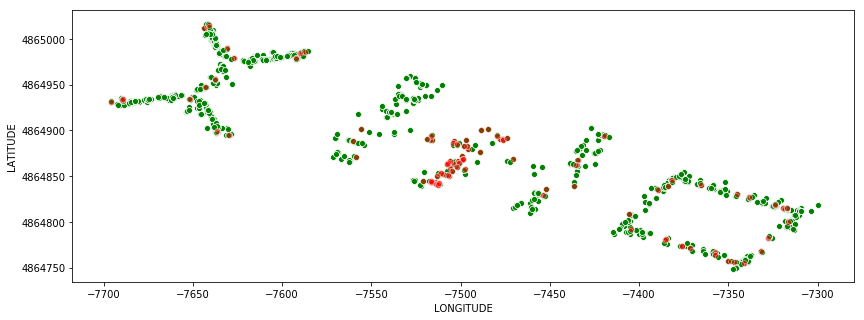

In [2072]:
#plotting wrong predictions for Floor (in red) and correct predictions (green)

fig, ax = plt.subplots(1, 1, figsize = (14, 5))

sns.scatterplot(Wifi_validation['LONGITUDE'],Wifi_validation['LATITUDE'],color='green')
sns.scatterplot(wrong_pred_BU0['LONGITUDE'],wrong_pred_BU0['LATITUDE'],color='red',alpha=0.5)
sns.scatterplot(wrong_pred_BU1['LONGITUDE'],wrong_pred_BU1['LATITUDE'],color='red',alpha=0.5)
sns.scatterplot(wrong_pred_BU2['LONGITUDE'],wrong_pred_BU2['LATITUDE'],color='red',alpha=0.5)

In [1848]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

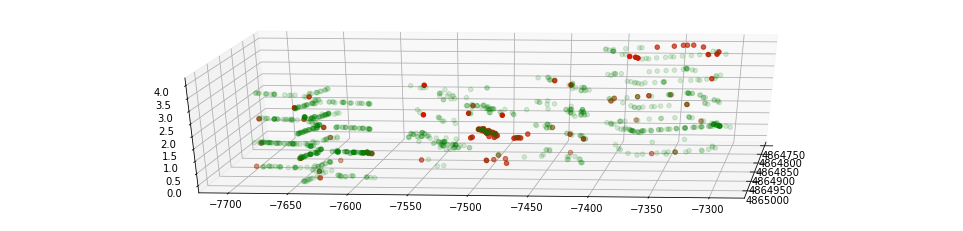

In [2073]:
fig = plt.figure(figsize = (17, 4))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Wifi_validation['LATITUDE'],Wifi_validation['LONGITUDE'],Wifi_validation['FLOOR'],alpha=0.15,color='green')
ax.scatter(wrong_pred_BU0['LATITUDE'],wrong_pred_BU0['LONGITUDE'],wrong_pred_BU0['FLOOR'], c='red')
ax.scatter(wrong_pred_BU1['LATITUDE'],wrong_pred_BU1['LONGITUDE'],wrong_pred_BU1['FLOOR'], c='red')
ax.scatter(wrong_pred_BU2['LATITUDE'],wrong_pred_BU2['LONGITUDE'],wrong_pred_BU2['FLOOR'], c='red')

ax.view_init(25,5)
plt.show()

### Prediciting Longitude

In [2086]:
Wifi_trainc = Wifi_train
Wifi_validationc = Wifi_validation

In [2087]:
#separate dependent(target) variable and independent variables

target = Wifi_trainc.loc[:, Wifi_trainc.columns == 'LONGITUDE']

df = Wifi_trainc.drop(['BUILDINGID','FLOOR','LATITUDE','BUILDINGID','LONGITUDE'],axis=1)

#split Data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)

In [2088]:
#splitting validation data set
y_validation = Wifi_validationc.loc[:, Wifi_validationc.columns == 'LONGITUDE']


X_validation = Wifi_validationc.drop(['BUILDINGID','LONGITUDE','LATITUDE','FLOOR','USERID','PHONEID','TIMESTAMP','RELATIVEPOSITION','SPACEID'],axis=1)

In [2089]:
X_validation.columns

Index(['WAP001', 'WAP002', 'WAP005', 'WAP006', 'WAP007', 'WAP008', 'WAP009',
       'WAP010', 'WAP011', 'WAP012',
       ...
       'WAP510', 'WAP511', 'WAP512', 'WAP513', 'WAP514', 'WAP515', 'WAP516',
       'WAP517', 'WAP518', 'WAP519'],
      dtype='object', length=465)

### KNN

In [2090]:
from sklearn.neighbors import KNeighborsRegressor

In [2091]:
knn = KNeighborsRegressor()

def knn_param_selection(X, y, nfolds):
    K = [2,3,4,5]
    
    param_grid = {'n_neighbors': K}
    grid_search = GridSearchCV(knn, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
knn_param_selection(X_train,y_train, 5)

In [2092]:
#optimal model
model = KNeighborsRegressor(n_neighbors=2)

In [2093]:
model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [2094]:
prediction_l_knn = model.predict(X_test)

In [2095]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,prediction_l_knn)

1.37408043519105

In [2096]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,prediction_l_knn)

34.17901208785746

In [2097]:
from sklearn.metrics import r2_score

r2_score(y_test,prediction_l_knn)

0.9977706189501901

In [2098]:
prediction_l_knn = model.predict(X_validation)

In [2099]:
mean_absolute_error(y_validation,prediction_l_knn)

5.9657459634442365

In [2100]:
mean_squared_error(y_validation,prediction_l_knn)

130.64617330678834

In [2101]:
r2_score(y_validation, prediction_l_knn)

0.9909507751830138

### Random Forest

In [2102]:
from sklearn.ensemble import RandomForestRegressor

In [2103]:
RF = RandomForestRegressor()

def RF_param_selection(X, y, nfolds):
    trees = [50,55,60,65,70,75,80,85,90,95,100]
    
    param_grid = {'n_estimators': trees}
    grid_search = GridSearchCV(RF, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
RF_param_selection(X_train,y_train, 5)

{'n_estimators': 90}

In [2104]:
#optimal model
model = RandomForestRegressor(n_estimators = 90)

In [2105]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [2106]:
prediction_l_rf = model.predict(X_test)

In [2107]:
mean_absolute_error(y_test,prediction_l_rf)

2.8040788712904927

In [2108]:
mean_squared_error(y_test,prediction_l_rf)

56.56971186708924

In [2109]:
r2_score(y_test,prediction_l_rf)

0.996310149535466

In [2110]:
prediction_l_rf = model.predict(X_validation)

In [2111]:
mean_absolute_error(y_validation,prediction_l_rf)

9.082187789499448

In [2112]:
mean_squared_error(y_validation,prediction_l_rf)

249.10876139795107

In [2113]:
r2_score(y_validation, prediction_l_rf)

0.9827454480394343

### Predicting Latitude

### KNN

In [2114]:
#separate dependent(target) variable and independent variables

target = Wifi_train.loc[:, Wifi_train.columns == 'LATITUDE']

df = Wifi_train.drop(['BUILDINGID','FLOOR','LONGITUDE','BUILDINGID','LATITUDE'],axis=1)

#split Data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)

In [2115]:
#splitting validation data set
y_validation = Wifi_validation.loc[:, Wifi_validation.columns == 'LATITUDE']


X_validation = Wifi_validation.drop(['BUILDINGID','LONGITUDE','LATITUDE','FLOOR','USERID','PHONEID','TIMESTAMP','RELATIVEPOSITION','SPACEID'],axis=1)

In [2116]:
X_validation.columns

Index(['WAP001', 'WAP002', 'WAP005', 'WAP006', 'WAP007', 'WAP008', 'WAP009',
       'WAP010', 'WAP011', 'WAP012',
       ...
       'WAP510', 'WAP511', 'WAP512', 'WAP513', 'WAP514', 'WAP515', 'WAP516',
       'WAP517', 'WAP518', 'WAP519'],
      dtype='object', length=465)

In [2117]:
knn = KNeighborsRegressor()

def knn_param_selection(X, y, nfolds):
    K = [2,3,4,5]
    
    param_grid = {'n_neighbors': K}
    grid_search = GridSearchCV(knn, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
knn_param_selection(X_train,y_train, 5)

In [2118]:
#optimal model
model = KNeighborsRegressor(n_neighbors=2)

In [2119]:
model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [2120]:
prediction_t_knn = model.predict(X_test)

In [2121]:
mean_absolute_error(y_test,prediction_t_knn)

1.2209322924747674

In [2122]:
mean_squared_error(y_test,prediction_t_knn)

22.417790131653835

In [2123]:
r2_score(y_test,prediction_t_knn)

0.995014787879354

In [2124]:
prediction_t_knn = model.predict(X_validation)

In [2125]:
mean_absolute_error(y_validation,prediction_t_knn)

5.684222565540536

In [2126]:
mean_squared_error(y_validation,prediction_t_knn)

112.84672091154563

In [2127]:
r2_score(y_validation, prediction_t_knn)

0.9771279276943374

### Random Forest

In [2130]:
RF = RandomForestRegressor()

def RF_param_selection(X, y, nfolds):
    trees = [50,55,60,65,70,75,80,85,90,95,100]
    
    param_grid = {'n_estimators': trees}
    grid_search = GridSearchCV(RF, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
RF_param_selection(X_train,y_train, 5)

{'n_estimators': 55}

In [2131]:
#optimal model
model = RandomForestRegressor(n_estimators = 55)

In [2132]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [2133]:
prediction_t_rf = model.predict(X_test)

In [2134]:
mean_absolute_error(y_test,prediction_t_rf)

2.2775905061594703

In [2135]:
mean_squared_error(y_test,prediction_t_rf)

29.913645309465203

In [2136]:
r2_score(y_test,prediction_t_rf)

0.9933478783460068

In [2137]:
prediction_t_rf = model.predict(X_validation)

In [2138]:
mean_absolute_error(y_validation,prediction_t_rf)

8.362670480706214

In [2139]:
mean_squared_error(y_validation,prediction_t_rf)

236.08875056978894

In [2140]:
r2_score(y_validation, prediction_t_rf)

0.9521489066765317

#### Plotting Position of Predictions for Long/Lat and actual Location

In [2141]:
type(prediction_t_rf)

numpy.ndarray

In [2142]:
prediction_l_knn2 = list(prediction_l_knn)
prediction_t_knn2 = list(prediction_t_knn)

In [2143]:
longlat = pd.DataFrame()

In [2144]:
prediction_l_knn.shape

(1111, 1)

In [2145]:
longlat['LONGITUDE']= prediction_l_knn2

In [2146]:
longlat['LATITUDE']=prediction_t_knn2

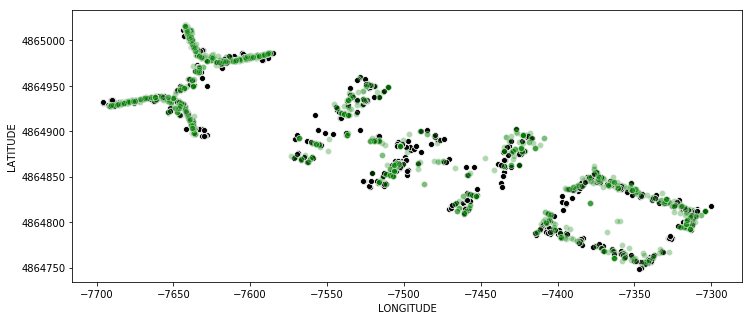

In [2149]:
#plotting predictions for coordinates (green) and real coordinates(black)

fig, ax = plt.subplots(1, 1, figsize = (12, 5))

sns.scatterplot(Wifi_validation['LONGITUDE'],Wifi_validation['LATITUDE'],color='black',alpha=1)
sns.scatterplot(longlat['LONGITUDE'],longlat['LATITUDE'],color='green',alpha=0.3,legend='full')